## K-최근접 이웃 알고리즘(KNN)  
+ __KNN 분류 알고리즘__ -> 클래스 분류  
+ __KNN 회귀 알고리즘__ -> 수치 예측  


## 데이터 준비  

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) # feature
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) # target

In [5]:
import matplotlib.pyplot as plt

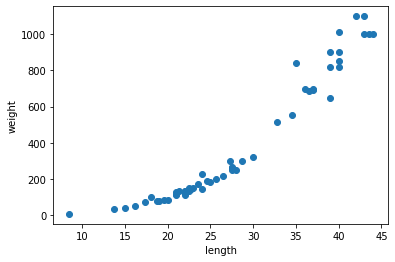

In [6]:
plt.scatter(x=perch_length,y=perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# 훈련세트 & 테스트세트 나누기
from sklearn.model_selection import train_test_split 
train_input,test_input,train_target,test_target=train_test_split(
    perch_length,perch_weight,random_state=42)

In [7]:
train_input # 훈련 input -> 1차원 배열

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

모델을 훈련시키려면 훈련세트/테스트세트 모두 2차원 배열이어야 함  


In [8]:
# reshape() 메소드
test_array=np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [10]:
test_array=test_array.reshape(2,2)
print(test_array)
print(test_array.shape)

[[1 2]
 [3 4]]
(2, 2)


In [11]:
# 참고: reshape()메소드에서 지정크기와 원본 배열의 개수가 다를때
test_array=test_array.reshape(2,3)

ValueError: ignored

In [14]:
# Train 데이터와 Test 데이터 2차원 배열로 바꿔주기
print(train_input.shape, test_input.shape)

(42,) (14,)


In [15]:
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


In [17]:
train_input # 2차원 배열로 변환 

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

## 결정계수($R^2$)  


In [18]:
# KNN 회귀 모델
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()

knr.fit(train_input,train_target) # 훈련세트로 모델 훈련하기 

KNeighborsRegressor()

결정 계수  
$R^2=1-\frac{\sum{(target-predict)^2}}{\sum{(target-mean)^2}}$  
+ target값과 predict값이 비슷해지면 $R^2 \approx 1$  
 

In [19]:
knr.score(test_input,test_target)

0.992809406101064

절댓값 오차 평균  
$\frac{\sum|target-predict|}{n}$

In [20]:
from sklearn.metrics import mean_absolute_error

test_prediction=knr.predict(test_input) # test 세트의 input에 대한 예측값

mae=mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


예측이 평균적으로 19g 정도 target값과 다르다는 것을 알 수 있음 

## 과대적합 vs 과소적합  
+ 훈련세트로 모델 평가해보기


In [21]:
train_prediction=knr.predict(train_input) # train 세트의 input에 대한 예측값
mae2=mean_absolute_error(train_target,train_prediction)
print(mae2)

35.76190476190476


In [22]:
knr.score(train_input,train_target)

0.9698823289099254

train 데이터로 학습시킨 모델인데,  
+ train 데이터로 계산한 $R^2$값이 test 데이터로 계산한 것보다 작음  
    --> `과소적합` 발생  

+ __과대적합(overfitting)__  
    Train세트에서는 점수가 좋은데 Test세트에서는 점수가 많이 낮을 때 
+ __과소적합(underfitting)__  
    Train보다 Test세트의 점수가 더 높거나 둘다 점수가 너무 낮은 경우  
    모델이 너무 단순해서 적절히 훈련되지 않은 경우  

--- 
테스트 데이터의 $R^2=0.99$, 훈련 데이터의 $R^2=0.97$  
--> `과소적합`   
모델을 더욱 복잡하게 만들어야 함  
--> k 작게 만들기  
+ sklearn의 KNN 알고리즘의 default k=5  
+ k=3으로 바꿔주기  

In [23]:
knr.n_neighbors=3

knr.fit(train_input,train_target)
knr.score(train_input,train_target)

0.9804899950518966

In [24]:
knr.score(test_input,test_target)

0.9746459963987609

Well fitted  

## 확인문제 2.  


In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# K-최근접 이웃 회귀 객체 만들기
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()

In [28]:
# [5,45) x 좌표 만들기
x=np.arange(5,45).reshape(-1,1)
x.shape

(40, 1)

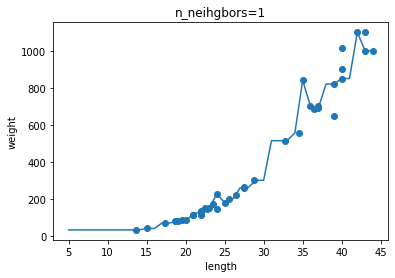

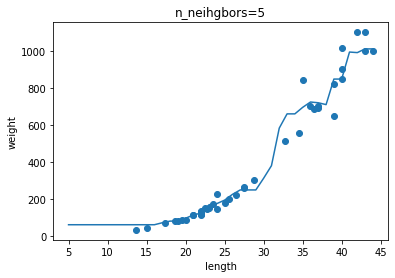

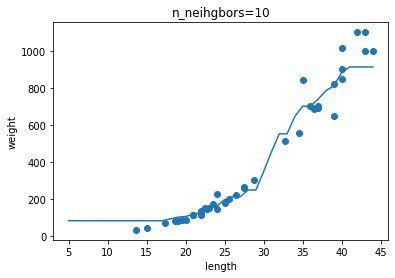

In [31]:
# k=1,5,10일때 예측값 scatter plot 그리기 
for k in [1,5,10]:
    knr.n_neighbors=k
    knr.fit(train_input,train_target)
    prediction=knr.predict(x)

    plt.scatter(train_input,train_target)
    plt.plot(x,prediction)
    plt.title(f'n_neihgbors={k}')
    plt.xlabel('length')
    plt.ylabel('weight')

    plt.show()